In [1036]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import date, datetime, time, timedelta

In [1037]:
jan = pd.read_csv('202101-capitalbikeshare-tripdata.csv') 

In [1038]:
jan.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,13A48BD20CC3DD85,classic_bike,2021-01-08 17:58:48,2021-01-08 18:25:23,Connecticut Ave & Yuma St NW,31318.0,Georgia Ave & Emerson St NW,31405.0,38.947156,-77.065115,38.949662,-77.027333,casual
1,CA68C580B32EEE66,electric_bike,2021-01-08 22:05:51,2021-01-08 22:23:52,8th & D St NW,31270.0,14th & D St SE,31663.0,38.894804,-77.023091,38.884053,-76.986043,member
2,5A925307814D5C2B,classic_bike,2021-01-21 17:20:31,2021-01-21 17:23:24,Wilson Blvd. & N. Vermont St.,31926.0,George Mason Dr & Wilson Blvd,31036.0,38.879477,-77.114563,38.878870,-77.120700,member
3,B6B2DB54A2B233EE,classic_bike,2021-01-28 10:06:30,2021-01-28 10:20:54,Franklin St & S Washington St,31907.0,Braddock Rd Metro,31047.0,38.798133,-77.048700,38.814577,-77.052808,member
4,921A142D5C8A9759,classic_bike,2021-01-11 12:09:45,2021-01-11 12:20:15,St. Asaph & Montgomery St,31931.0,Braddock Rd Metro,31047.0,38.814185,-77.043809,38.814577,-77.052808,casual


In [1039]:
jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100070 entries, 0 to 100069
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             100070 non-null  object 
 1   rideable_type       100070 non-null  object 
 2   started_at          100070 non-null  object 
 3   ended_at            100070 non-null  object 
 4   start_station_name  89963 non-null   object 
 5   start_station_id    89963 non-null   float64
 6   end_station_name    88688 non-null   object 
 7   end_station_id      88688 non-null   float64
 8   start_lat           100070 non-null  float64
 9   start_lng           100070 non-null  float64
 10  end_lat             99913 non-null   float64
 11  end_lng             99913 non-null   float64
 12  member_casual       100070 non-null  object 
dtypes: float64(6), object(7)
memory usage: 9.9+ MB


In [1040]:
jan.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    10107
start_station_id      10107
end_station_name      11382
end_station_id        11382
start_lat                 0
start_lng                 0
end_lat                 157
end_lng                 157
member_casual             0
dtype: int64

In [1041]:
jan.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,89963.000000,88688.000000,100070.000000,100070.000000,99913.000000,99913.000000
mean,31364.762036,31366.006044,38.907127,-77.031105,38.906055,-77.030925
std,259.424599,258.843521,0.027526,0.031659,0.027365,0.031627
min,31000.000000,31000.000000,38.782633,-77.368416,38.720000,-77.370000
25%,31201.000000,31202.000000,38.894832,-77.044400,38.894758,-77.044400
50%,31276.000000,31275.000000,38.905697,-77.031737,38.905424,-77.031737
75%,31606.000000,31606.000000,38.919018,-77.013769,38.917200,-77.013500
max,32901.000000,32901.000000,39.123330,-76.825533,39.123513,-76.825535


In [1042]:
# January - Kind of user
jan['member_casual'].value_counts(ascending=False)

member    66683
casual    33387
Name: member_casual, dtype: int64

In [1043]:
# January - Kind of bike
jan['rideable_type'].value_counts(ascending=False)

classic_bike     68687
electric_bike    26776
docked_bike       4607
Name: rideable_type, dtype: int64

In [1044]:
# January - Start station name
jan['start_station_name'].value_counts(ascending=False).head(60)

15th & P St NW                                         1183
New Hampshire Ave & T St NW                            1117
14th & Irving St NW                                    1065
1st & M St NE                                           922
8th & O St NW                                           880
14th & V St NW                                          861
11th & M St NW                                          836
Thomas Circle                                           804
5th & K St NW                                           794
Adams Mill & Columbia Rd NW                             732
15th & Euclid St  NW                                    729
20th St & Florida Ave NW                                710
Eastern Market Metro / Pennsylvania Ave & 8th St SE     699
14th & R St NW                                          698
15th & W St NW                                          684
3rd & M St NE                                           675
17th & Corcoran St NW                   

In [1045]:
# January - End station name
jan['end_station_name'].value_counts(ascending=False).head(60)

15th & P St NW                                         1326
New Hampshire Ave & T St NW                            1208
14th & V St NW                                         1057
1st & M St NE                                          1040
8th & O St NW                                           882
17th & Corcoran St NW                                   833
14th & R St NW                                          812
14th & Irving St NW                                     760
11th & M St NW                                          757
15th & W St NW                                          752
5th & K St NW                                           739
3rd & M St NE                                           725
Massachusetts Ave & Dupont Circle NW                    711
6th & H St NE                                           698
Eastern Market Metro / Pennsylvania Ave & 8th St SE     694
Thomas Circle                                           676
20th St & Florida Ave NW                

In [1057]:
last_week = pd.read_csv("last_week.csv")
last_week.head()

,Unnamed: 0,day,hour,member_type,count
0,0,2021-01-25,0,casual,4
1,1,2021-01-25,0,member,4
2,2,2021-01-25,1,casual,2
3,3,2021-01-25,1,member,4
4,4,2021-01-25,2,casual,3


In [1056]:
df = last_week.loc[:,['count','member_type','casual_count', 'member_count' ,'hour']]
#type(df.groupby(['member_type']).sum())
#df.fillna(0,inplace= True)

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['casual_count', 'member_count'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [348]:
type(df)

pandas.core.frame.DataFrame

In [349]:
last_week.dtypes

Unnamed: 0      int64
day            object
hour            int64
member_type    object
count           int64
dtype: object

In [350]:
last_week.loc[(last_week['member_type'] == 'casual'),'casual_count'] = 'yes'
last_week.loc[(last_week['member_type'] == 'member'),'member_count'] = 'yes'

In [351]:
last_week.fillna

<bound method DataFrame.fillna of      Unnamed: 0         day  hour member_type  count casual_count member_count
0             0  2021-01-25     0      casual      4          yes          NaN
1             1  2021-01-25     0      member      4          NaN          yes
2             2  2021-01-25     1      casual      2          yes          NaN
3             3  2021-01-25     1      member      4          NaN          yes
4             4  2021-01-25     2      casual      3          yes          NaN
..          ...         ...   ...         ...    ...          ...          ...
329         329  2021-01-31    21      member     15          NaN          yes
330         330  2021-01-31    22      casual      9          yes          NaN
331         331  2021-01-31    22      member     12          NaN          yes
332         332  2021-01-31    23      casual      3          yes          NaN
333         333  2021-01-31    23      member      7          NaN          yes

[334 rows x 7 col

In [352]:
last_week.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    334 non-null    int64 
 1   day           334 non-null    object
 2   hour          334 non-null    int64 
 3   member_type   334 non-null    object
 4   count         334 non-null    int64 
 5   casual_count  168 non-null    object
 6   member_count  166 non-null    object
dtypes: int64(3), object(4)
memory usage: 18.4+ KB


In [1060]:
# Create 3 dataframes with the count per hour
total_hour = last_week.groupby(by="hour").sum()
reg_hour=registered.groupby(by="hour").sum()
cas_hour=casual.groupby(by="hour").sum()
total_hour

KeyError: 'hour'

In [1062]:
total_days = last_week.groupby(by="day").sum()
total_days= total_days.rename(columns={"count": "Total"})
total = total_days.drop(['Unnamed: 0', "hour"], axis=1)

In [1063]:
total

,Total
day,
2021-01-25,2390
2021-01-26,1997
2021-01-27,3528
2021-01-28,2667
2021-01-29,2870
2021-01-30,3998
2021-01-31,1035


In [1064]:
total_hour = total_hour.rename(columns={"count": "Total"})
total = total_hour.drop(['Unnamed: 0'], axis=1)


In [1067]:
reg_hour = reg_hour.rename(columns={"count": "Registered"})
registered_hours = reg_hour.drop(['Unnamed: 0'], axis=1)


,Registered
hour,
0,85
1,39
2,22
3,14
4,33
5,92
6,316
7,587
8,781


In [1066]:
last_week

,Unnamed: 0,day,hour,member_type,count
0,0,2021-01-25,0,casual,4
1,1,2021-01-25,0,member,4
2,2,2021-01-25,1,casual,2
3,3,2021-01-25,1,member,4
4,4,2021-01-25,2,casual,3
...,...,...,...,...,...
329,329,2021-01-31,21,member,15
330,330,2021-01-31,22,casual,9
331,331,2021-01-31,22,member,12
332,332,2021-01-31,23,casual,3


In [1068]:
cas_hour = cas_hour.rename(columns={"count": "Casual"})
casual_hours = cas_hour.drop(['Unnamed: 0'], axis=1)
casual_hours

,Casual
hour,
0,53
1,30
2,22
3,12
4,23
5,26
6,71
7,119
8,202


In [1100]:
cas1 = casual.drop(["Unnamed: 0", "member_type", "week"], axis=1)
cas2 = cas1.rename(columns={"count": "casual"})
cas2

,day,hour,casual
0,2021-01-25,0,4
2,2021-01-25,1,2
4,2021-01-25,2,3
6,2021-01-25,3,1
8,2021-01-25,4,3
...,...,...,...
324,2021-01-31,19,9
326,2021-01-31,20,11
328,2021-01-31,21,9
330,2021-01-31,22,9


In [1113]:
registered

,Unnamed: 0,day,hour,member_type,count
1,1,2021-01-25,0,member,4
3,3,2021-01-25,1,member,4
5,5,2021-01-25,2,member,2
7,7,2021-01-25,3,member,3
9,9,2021-01-25,4,member,2
...,...,...,...,...,...
325,325,2021-01-31,19,member,17
327,327,2021-01-31,20,member,16
329,329,2021-01-31,21,member,15
331,331,2021-01-31,22,member,12


In [1111]:
# Create a Dataset for weekdays and one for weekend
#weekdays = last_week[last_week["week"]=="weekday"]
#weekend = last_week[last_week["week"]=="weekend"]

# Create a Dataset for registered users and casual users
registered = last_week[last_week["member_type"]=="member"]
casual = last_week[last_week["member_type"]=="casual"]

In [1118]:
reg1 = registered.drop(["Unnamed: 0", "member_type"], axis=1)
reg2 = reg1.rename(columns={"count": "registered"})
reg2


,day,hour,registered
1,2021-01-25,0,4
3,2021-01-25,1,4
5,2021-01-25,2,2
7,2021-01-25,3,3
9,2021-01-25,4,2
...,...,...,...
325,2021-01-31,19,17
327,2021-01-31,20,16
329,2021-01-31,21,15
331,2021-01-31,22,12


In [1119]:
reg2['timestamp']= pd.to_datetime(reg2["day"]) + pd.to_timedelta(reg2['hour'], unit='h')
reg2

,day,hour,registered,timestamp
1,2021-01-25,0,4,2021-01-25 00:00:00
3,2021-01-25,1,4,2021-01-25 01:00:00
5,2021-01-25,2,2,2021-01-25 02:00:00
7,2021-01-25,3,3,2021-01-25 03:00:00
9,2021-01-25,4,2,2021-01-25 04:00:00
...,...,...,...,...
325,2021-01-31,19,17,2021-01-31 19:00:00
327,2021-01-31,20,16,2021-01-31 20:00:00
329,2021-01-31,21,15,2021-01-31 21:00:00
331,2021-01-31,22,12,2021-01-31 22:00:00


In [1117]:
cas2['timestamp']= pd.to_datetime(cas2["day"]) + pd.to_timedelta(cas2['hour'], unit='h')
cas2

,day,hour,casual,timestamp
0,2021-01-25,0,4,2021-01-25 00:00:00
2,2021-01-25,1,2,2021-01-25 01:00:00
4,2021-01-25,2,3,2021-01-25 02:00:00
6,2021-01-25,3,1,2021-01-25 03:00:00
8,2021-01-25,4,3,2021-01-25 04:00:00
...,...,...,...,...
324,2021-01-31,19,9,2021-01-31 19:00:00
326,2021-01-31,20,11,2021-01-31 20:00:00
328,2021-01-31,21,9,2021-01-31 21:00:00
330,2021-01-31,22,9,2021-01-31 22:00:00


In [1121]:
#### ====================================== final

merged = pd.merge(cas2, reg2, on=["timestamp"])
merged

,day_x,hour_x,casual,timestamp,day_y,hour_y,registered
0,2021-01-25,0,4,2021-01-25 00:00:00,2021-01-25,0,4
1,2021-01-25,1,2,2021-01-25 01:00:00,2021-01-25,1,4
2,2021-01-25,2,3,2021-01-25 02:00:00,2021-01-25,2,2
3,2021-01-25,3,1,2021-01-25 03:00:00,2021-01-25,3,3
4,2021-01-25,4,3,2021-01-25 04:00:00,2021-01-25,4,2
...,...,...,...,...,...,...,...
161,2021-01-31,19,9,2021-01-31 19:00:00,2021-01-31,19,17
162,2021-01-31,20,11,2021-01-31 20:00:00,2021-01-31,20,16
163,2021-01-31,21,9,2021-01-31 21:00:00,2021-01-31,21,15
164,2021-01-31,22,9,2021-01-31 22:00:00,2021-01-31,22,12


In [1080]:
tot1 = total_hour.rename(columns={"count": "Total"})
cas_hour

,Unnamed: 0,Casual
hour,,
0,1003,53
1,1017,30
2,1031,22
3,1045,12
4,1057,23
5,1071,26
6,1085,71
7,1099,119
8,1113,202


In [359]:
rides = pd.DataFrame(cas1, columns = ['casual'])
rides

,casual
0,53
1,30
2,22
3,12
4,23
5,26
6,71
7,119
8,202
9,201


In [230]:
# Combine the three datasets into one - rides

rides= pd.concat([total,registered_hours, casual_hours])
rides

,Total,Registered,Casual
hour,,,
0,138.0,NaN,NaN
1,69.0,NaN,NaN
2,44.0,NaN,NaN
3,26.0,NaN,NaN
4,56.0,NaN,NaN
...,...,...,...
19,NaN,NaN,239.0
20,NaN,NaN,166.0
21,NaN,NaN,133.0


In [202]:
rides.isnull().sum()

Total         48
Registered    48
Casual        48
dtype: int64

In [203]:
last_week['day'].value_counts(ascending=False)

2021-01-31    48
2021-01-26    48
2021-01-25    48
2021-01-27    48
2021-01-30    48
2021-01-29    47
2021-01-28    47
Name: day, dtype: int64

In [204]:
last_week['hour'].value_counts(ascending=False)

23    14
22    14
1     14
2     14
4     14
5     14
6     14
7     14
8     14
9     14
10    14
11    14
12    14
13    14
14    14
15    14
16    14
17    14
18    14
19    14
20    14
21    14
0     14
3     12
Name: hour, dtype: int64

In [205]:
last_week['hour'].value_counts(ascending=False)

23    14
22    14
1     14
2     14
4     14
5     14
6     14
7     14
8     14
9     14
10    14
11    14
12    14
13    14
14    14
15    14
16    14
17    14
18    14
19    14
20    14
21    14
0     14
3     12
Name: hour, dtype: int64

In [206]:
last_week.groupby(by="day").min()

,Unnamed: 0,hour,member_type,count
day,,,,
2021-01-25,0,0,casual,1
2021-01-26,48,0,casual,1
2021-01-27,96,0,casual,1
2021-01-28,144,0,casual,1
2021-01-29,191,0,casual,1
2021-01-30,238,0,casual,2
2021-01-31,286,0,casual,1


In [207]:
# Add a new column with defining weekday or weekend
last_week['week'] = last_week['day'].apply(lambda value: 'weekend'
if value == "2021-01-30"  else 'weekend'
if value == "2021-01-31" else 'weekday')
last_week['week'] = pd.Categorical(last_week['week'],
categories=['weekday', 'weekend'])

<AxesSubplot:xlabel='hour', ylabel='count'>

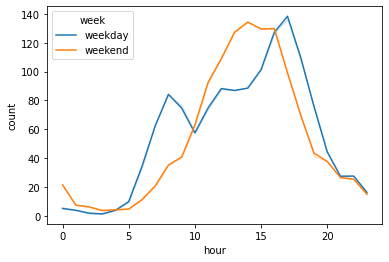

In [208]:
# Bike demand - at what time are bikes used? Weekdays / Weekend
# On weekdays there are two spikes, one at around 8 and another one around 16-17
# On weekends there are no clear spikes but the users ride most from 12 to 16

sns.lineplot(
    data=last_week, x="hour", y="count", hue="week", ci=0
)

<AxesSubplot:xlabel='hour', ylabel='count'>

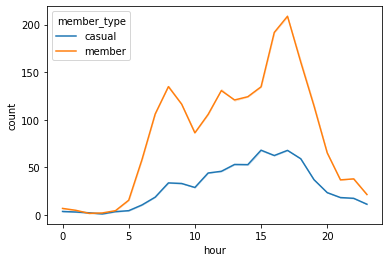

In [210]:
# Bike demand - who are the users? Weekdays
# There are more registered that casual members
# The registered members are responsivle for the spikes at 8 and at 16
# The new members normaly ride in the afternoon and have a similar behaviour like on the weekends

sns.lineplot(
    data=weekdays, x="hour", y="count", hue="member_type", ci=0
)

<AxesSubplot:xlabel='hour', ylabel='count'>

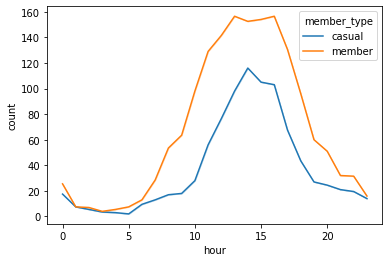

In [211]:
# Bike demand - who are the users? Weekend
# There are more registered members than casual members
# Both registered and casual members have a similar behaviour
# No spike but higher demand between 12 and 16

sns.lineplot(
    data=weekend, x="hour", y="count", hue="member_type", ci=0
)

<AxesSubplot:xlabel='hour', ylabel='count'>

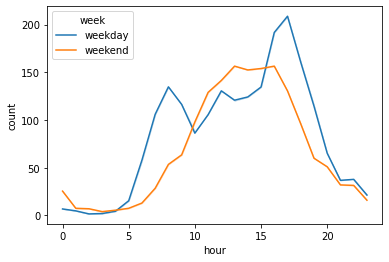

In [212]:
# Bike demand - when are registered users using the bikes? Weekdays vs Weekend
# Registered users create the two spikes at 8 and 16 on weekdays
# Registered users tend to use the bike at noon til early afternoon

sns.lineplot(
    data=registered, x="hour", y="count", hue="week", ci=0
)

<AxesSubplot:xlabel='hour', ylabel='count'>

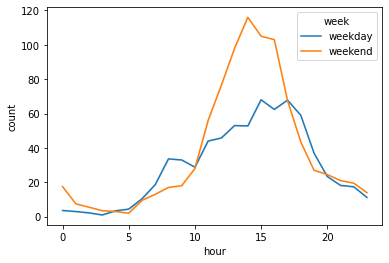

In [213]:
# Bike demand - when are casual users using the bikes? Weekdays vs Weekend
# Casual users tend to use the bikes in the afternoon
# There are way more new users a day on the weekend than on weekdays

sns.lineplot(
    data=casual, x="hour", y="count", hue="week", ci=0
)

In [214]:
# Weekdays total count casual
print("Casual: Weekdays total")
print(casual[casual["week"]=="weekday"]["count"].sum())
print("Casual: Weekdays average")
print(casual[casual["week"]=="weekday"]["count"].sum()/5)
# Weekend total count casual
print("Casual: Weekends total")
print(casual[casual["week"]=="weekend"]["count"].sum())
print("Casual: Weekends average")
print(casual[casual["week"]=="weekend"]["count"].sum()/2)
# On weekends the average of casual users is higher than on weekdays

Casual: Weekdays total
3510
Casual: Weekdays average
702.0
Casual: Weekends total
1792
Casual: Weekends average
896.0


In [215]:
print(last_week[last_week['member_type']=="member"]["count"].sum())
print(last_week[last_week['member_type']=="casual"]["count"].sum())



13183
5302


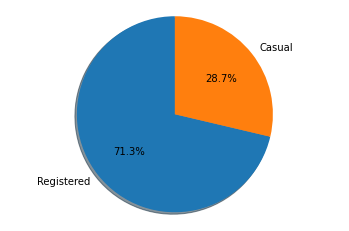

In [216]:
# Pie chart of bike users last week
labels = 'Registered', 'Casual'
sizes = [13183, 5302]


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

In [217]:
cas = last_week[last_week['member_type']=="casual"].groupby(by=["hour"]).sum()["count"]
cas

hour
0      53
1      30
2      22
3      12
4      23
5      26
6      71
7     119
8     202
9     201
10    200
11    332
12    382
13    461
14    496
15    550
16    518
17    474
18    382
19    239
20    166
21    133
22    126
23     84
Name: count, dtype: int64

In [218]:
res = last_week[last_week['member_type']=="member"].groupby(by=["hour"]).sum()["count"]
res

hour
0       85
1       39
2       22
3       14
4       33
5       92
6      316
7      587
8      781
9      709
10     627
11     786
12     936
13     917
14     926
15     981
16    1272
17    1305
18     995
19     693
20     428
21     248
22     252
23     139
Name: count, dtype: int64

In [219]:
cas

hour
0      53
1      30
2      22
3      12
4      23
5      26
6      71
7     119
8     202
9     201
10    200
11    332
12    382
13    461
14    496
15    550
16    518
17    474
18    382
19    239
20    166
21    133
22    126
23     84
Name: count, dtype: int64

In [335]:
day=pd.read_csv('day.csv') 
day.tail(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
721,722,2012-12-22,1,1,12,0,6,0,1,0.265833,0.236113,0.441250,0.407346,205,1544,1749
722,723,2012-12-23,1,1,12,0,0,0,1,0.245833,0.259471,0.515417,0.133083,408,1379,1787
723,724,2012-12-24,1,1,12,0,1,1,2,0.231304,0.258900,0.791304,0.077230,174,746,920
724,725,2012-12-25,1,1,12,1,2,0,2,0.291304,0.294465,0.734783,0.168726,440,573,1013
725,726,2012-12-26,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


<AxesSubplot:xlabel='dteday', ylabel='cnt'>

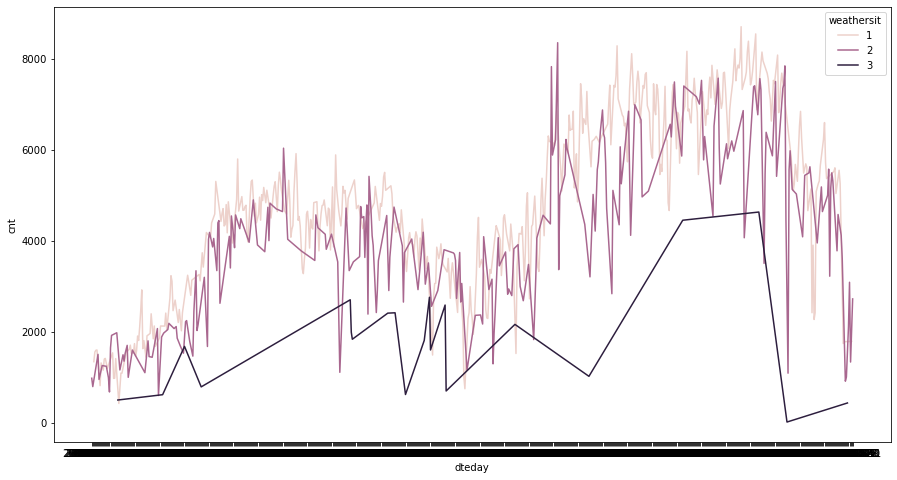

In [321]:
plt.figure(figsize=(15,8))
sns.lineplot(
    data=day, x="dteday", y="cnt", hue="weathersit", ci=0
)

In [332]:
day[day["weathersit"]==3].sum()["cnt"]

37869

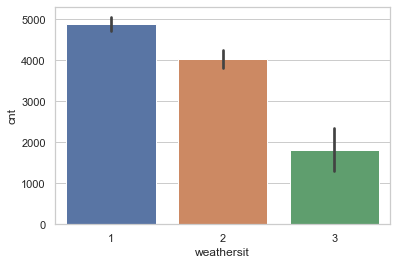

In [334]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="weathersit", y="cnt", data=day)

In [370]:
df = pd.read_json('https://gbfs.capitalbikeshare.com/gbfs/en/free_bike_status.json')

In [371]:
df.iloc[:,:]

,data,last_updated,ttl
bikes,"[{'type': 'electric_bike', 'is_reserved': 0, '...",1615294810,5


In [373]:
lat =  []
lon = []
for i in df['data']['bikes']:
    lat.append(i['lat'])
    lon.append(i['lon'])
    

In [374]:
print(lon)

[-76.98559666666667, -77.01616916666667, -77.01740833333334, -76.98784033333334, -77.11303683333334, -77.04936916666666, -77.11033216666667, -77.12008666666667, -77.11177733333334, -76.95348533333333, -76.985528, -77.02556033333333, -77.04750783333333, -76.93047583333333, -76.88529366666667, -77.093425, -77.07964133333333, -77.02509683333334, -76.99049733333334, -76.99472166666666, -76.97207283333333, -77.08841716666667, -76.992219, -77.02911133333333, -77.053742, -77.03370816666667, -77.10424416666666, -76.97836783333334, -76.885832, -76.98772716666667, -77.01615966666667, -77.1380195, -76.9718315, -76.95253966666667, -76.99182033333334, -76.97436333333333, -77.09671433333334, -77.004992, -77.042704, -77.02372, -77.01550466666667, -76.9867265, -76.99348866666666, -77.08841616666666, -77.03051616666667, -76.97492616666666, -76.95673116666667, -76.9928205, -76.97337133333333, -76.995125, -77.02950466666667, -76.98916833333334, -77.02231966666666, -76.95241733333333, -77.03290466666667, 

In [379]:
df = pd.DataFrame(index = range(len(lat)))

In [381]:
df['Latitude'] = lat

In [383]:
df['Longitude'] = lon

In [384]:
df

,Latitude,Longitude
0,38.895247,-76.985597
1,38.949163,-77.016169
2,38.906188,-77.017408
3,38.867287,-76.987840
4,38.882258,-77.113037
...,...,...
282,38.998543,-77.046492
283,38.911291,-77.031300
284,38.903349,-76.985284
285,38.920850,-76.952571


In [811]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

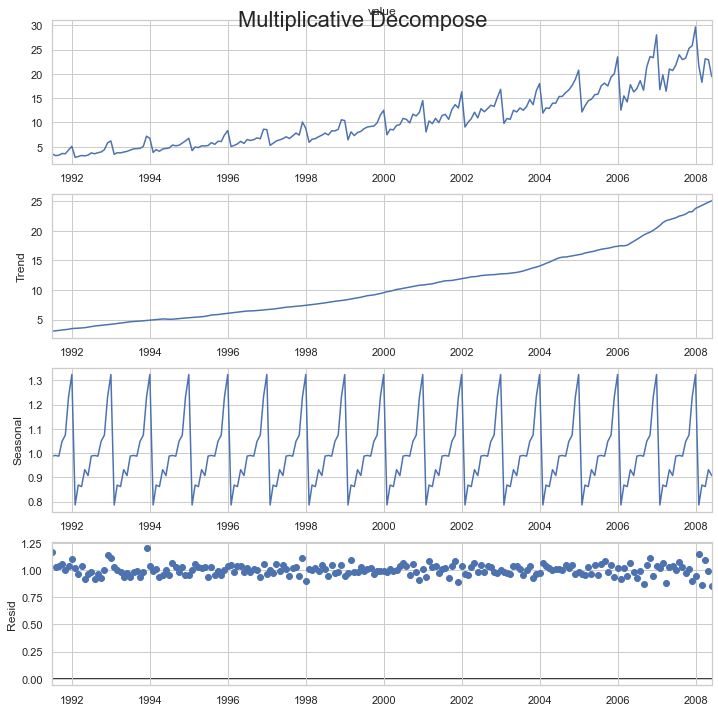

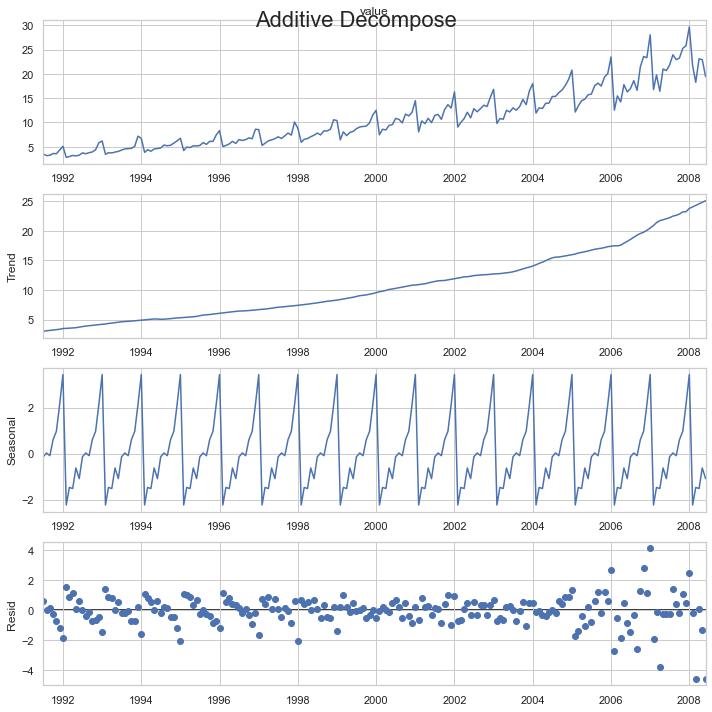

In [430]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [431]:
df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


In [433]:
day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [621]:
hour = pd.read_csv("hour.csv")
hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [629]:
hour.dtypes

instant                int64
dteday                object
season                 int64
yr                     int64
mnth                   int64
hr                    object
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dayhour       datetime64[ns]
dtype: object

In [535]:
type(hour["dteday"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [623]:
hour["hr"]= hour["hr"].astype(str)


In [624]:
hour=hour.replace({'0': " 00:00:00",'1': " 01:00:00", "2":" 02:00:00",'3': " 03:00:00", "4":" 04:00:00",'5': " 05:00:00",'6': " 06:00:00", "7":" 07:00:00",'8': " 08:00:00", "9":" 09:00:00", '10': " 10:00:00",'11': " 11:00:00", "12":" 12:00:00",'13': " 13:00:00", "14":" 14:00:00",'15': " 15:00:00",'16': " 16:00:00", "17":" 17:00:00",'18': " 18:00:00", "19":" 19:00:00",'20': " 20:00:00",'21': " 21:00:00", "22":" 22:00:00",'23': " 23:00:00" })

In [626]:
hour["dayhour"] = hour["dteday"] + hour["hr"]

In [628]:
hour["dayhour"] = pd.to_datetime(hour["dayhour"] )

In [631]:
hour.index = hour["dayhour"]

In [633]:
hour.index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', name='dayhour', length=17379, freq=None)

In [632]:
hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dayhour
dayhour,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,2011-01-01,1,0,1,00:00:00,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,2011-01-01 00:00:00
2011-01-01 01:00:00,2,2011-01-01,1,0,1,01:00:00,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,2011-01-01 01:00:00
2011-01-01 02:00:00,3,2011-01-01,1,0,1,02:00:00,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,2011-01-01 02:00:00
2011-01-01 03:00:00,4,2011-01-01,1,0,1,03:00:00,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,2011-01-01 03:00:00
2011-01-01 04:00:00,5,2011-01-01,1,0,1,04:00:00,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,2011-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,17375,2012-12-31,1,1,12,19:00:00,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,2012-12-31 19:00:00
2012-12-31 20:00:00,17376,2012-12-31,1,1,12,20:00:00,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,2012-12-31 20:00:00
2012-12-31 21:00:00,17377,2012-12-31,1,1,12,21:00:00,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,2012-12-31 21:00:00


In [744]:
hour.loc['2011-10-12 00:00:00' : '2011-10-15 00:00:00',:].resample('30T').sum()['cnt'].head(24)

dayhour
2011-10-12 00:00:00     25
2011-10-12 00:30:00      0
2011-10-12 01:00:00     10
2011-10-12 01:30:00      0
2011-10-12 02:00:00      2
2011-10-12 02:30:00      0
2011-10-12 03:00:00      2
2011-10-12 03:30:00      0
2011-10-12 04:00:00      7
2011-10-12 04:30:00      0
2011-10-12 05:00:00     22
2011-10-12 05:30:00      0
2011-10-12 06:00:00    112
2011-10-12 06:30:00      0
2011-10-12 07:00:00    259
2011-10-12 07:30:00      0
2011-10-12 08:00:00    404
2011-10-12 08:30:00      0
2011-10-12 09:00:00    197
2011-10-12 09:30:00      0
2011-10-12 10:00:00    113
2011-10-12 10:30:00      0
2011-10-12 11:00:00    120
2011-10-12 11:30:00      0
Freq: 30T, Name: cnt, dtype: int64

In [690]:
hourtest = pd.read_csv("hour.csv")
hourtest

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [691]:
hourtest["dteday"] = pd.to_datetime(hourtest["dteday"] )

In [692]:
hourtest.index = hourtest["dteday"]

In [693]:
hourtest.index

DatetimeIndex(['2011-01-01', '2011-01-01', '2011-01-01', '2011-01-01',
               '2011-01-01', '2011-01-01', '2011-01-01', '2011-01-01',
               '2011-01-01', '2011-01-01',
               ...
               '2012-12-31', '2012-12-31', '2012-12-31', '2012-12-31',
               '2012-12-31', '2012-12-31', '2012-12-31', '2012-12-31',
               '2012-12-31', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=17379, freq=None)

In [1035]:
hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dayhour
dayhour,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,2011-01-01,1,0,1,00:00:00,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,2011-01-01 00:00:00
2011-01-01 01:00:00,2,2011-01-01,1,0,1,01:00:00,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,2011-01-01 01:00:00
2011-01-01 02:00:00,3,2011-01-01,1,0,1,02:00:00,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,2011-01-01 02:00:00
2011-01-01 03:00:00,4,2011-01-01,1,0,1,03:00:00,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,2011-01-01 03:00:00
2011-01-01 04:00:00,5,2011-01-01,1,0,1,04:00:00,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,2011-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,17375,2012-12-31,1,1,12,19:00:00,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,2012-12-31 19:00:00
2012-12-31 20:00:00,17376,2012-12-31,1,1,12,20:00:00,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,2012-12-31 20:00:00
2012-12-31 21:00:00,17377,2012-12-31,1,1,12,21:00:00,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,2012-12-31 21:00:00


In [694]:
hourtest

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,,,
2011-01-01,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2011-01-01,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2011-01-01,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
2011-01-01,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
2011-01-01,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
2012-12-31,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
2012-12-31,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90


In [809]:
hourtest.loc['2011-10-11' : '2011-10-17',: ].resample('1D').sum()['cnt']

dteday
2011-10-11    4563
2011-10-12    2416
2011-10-13    2913
2011-10-14    3644
2011-10-15    5217
2011-10-16    5041
2011-10-17    4570
Freq: D, Name: cnt, dtype: int64

In [810]:
hour.loc['2011-10-11' : '2011-10-17',: ].resample('1D').sum()['cnt']

dayhour
2011-10-11    4563
2011-10-12    2416
2011-10-13    2913
2011-10-14    3644
2011-10-15    5217
2011-10-16    5041
2011-10-17    4570
Freq: D, Name: cnt, dtype: int64

In [804]:
hourtest.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [803]:
hour.loc['2011-10-11' : '2011-10-11',: ].resample('100T').count()['cnt']

dayhour
2011-10-11 00:00:00    2
2011-10-11 01:40:00    2
2011-10-11 03:20:00    1
2011-10-11 05:00:00    2
2011-10-11 06:40:00    2
2011-10-11 08:20:00    1
2011-10-11 10:00:00    2
2011-10-11 11:40:00    2
2011-10-11 13:20:00    1
2011-10-11 15:00:00    2
2011-10-11 16:40:00    2
2011-10-11 18:20:00    1
2011-10-11 20:00:00    2
2011-10-11 21:40:00    2
Freq: 100T, Name: cnt, dtype: int64

<AxesSubplot:xlabel='dayhour'>

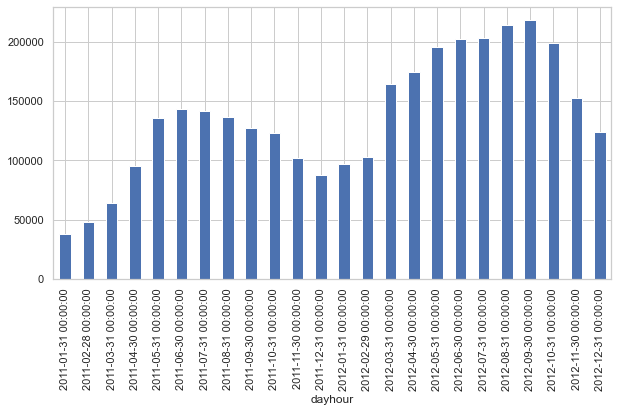

In [862]:
# Year 2011 - 2012
hour.loc["2011-01-01" : '2012-12-31',: ].resample('1M').sum()['cnt'].plot(kind = 'bar', figsize=(10,5))


<AxesSubplot:xlabel='dayhour'>

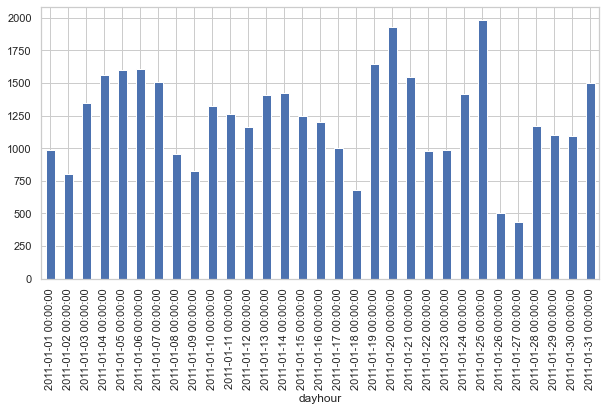

In [864]:
# January 2010 - Monthly
hour.loc["2011-01-01" : '2011-01-31',: ].resample('1D').sum()['cnt'].plot(kind = 'bar', figsize=(10,5))


<AxesSubplot:xlabel='dayhour'>

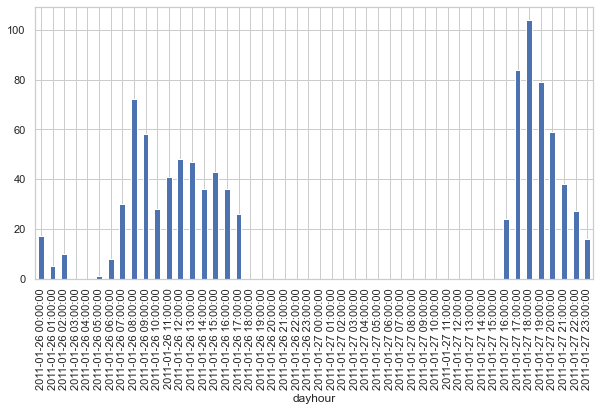

In [867]:
# Missing values therefore less rides counted
hour.loc["2011-01-26" : "2011-01-27",: ].resample('1H').sum()['cnt'].plot(kind = 'bar', figsize=(10,5))

<AxesSubplot:xlabel='dayhour'>

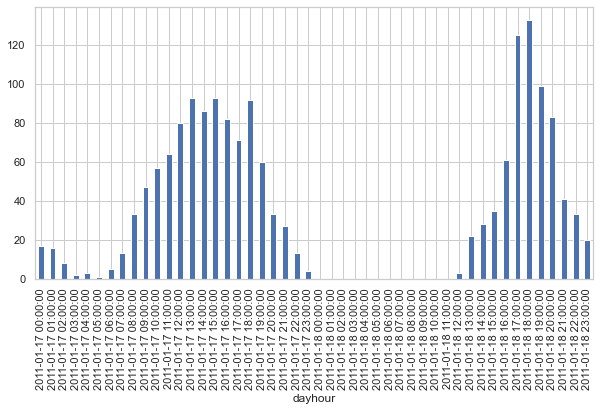

In [869]:
# Missing values therefore less rides counted
hour.loc["2011-01-17" : "2011-01-18",: ].resample('1H').sum()['cnt'].plot(kind = 'bar', figsize=(10,5))

<AxesSubplot:xlabel='dayhour'>

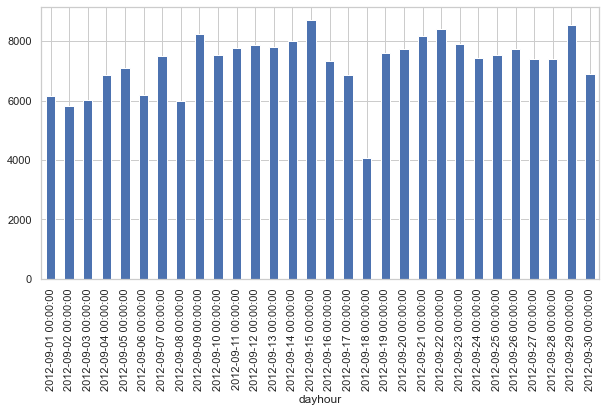

In [870]:
# September 2011 - month with most rides
hour.loc["2012-09-01" : "2012-09-30",: ].resample('1D').sum()['cnt'].plot(kind = 'bar', figsize=(10,5))

<AxesSubplot:xlabel='dayhour'>

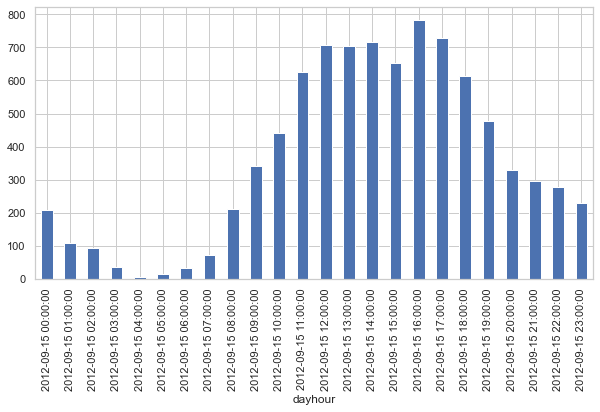

In [903]:
# 15 September 2011 - day with most rides

hour.loc["2012-09-15" : "2012-09-15",: ].resample('1H').sum()['cnt'].plot(kind = 'bar', figsize=(10,5))

In [885]:
hour.loc["2012-09-15" : "2012-09-15",: ].sum()['cnt']

8714

<AxesSubplot:xlabel='dayhour'>

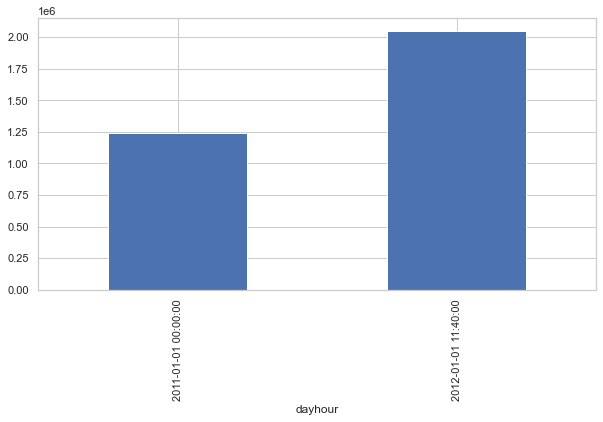

In [891]:
# Year 2011 - 2012
hour.loc["2011-01-01" : '2012-12-31',: ].resample('526300T').sum()['cnt'].plot(kind = 'bar', figsize=(10,5))

<AxesSubplot:xlabel='dayhour'>

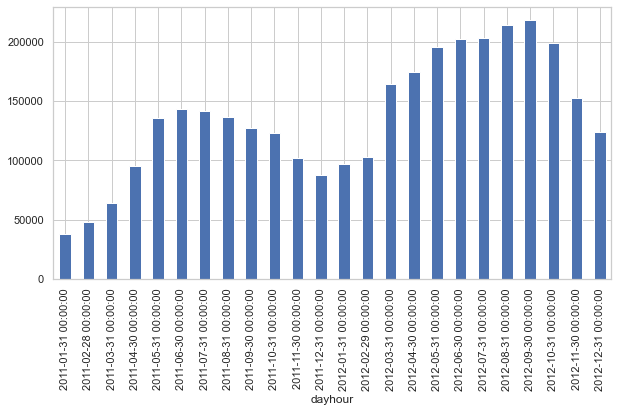

In [905]:
# Month 2011 - 2012
hour.loc["2011-01-01" : '2012-12-31',: ].resample('1M').sum()['cnt'].plot(kind = 'bar', figsize=(10,5))

<AxesSubplot:xlabel='dayhour'>

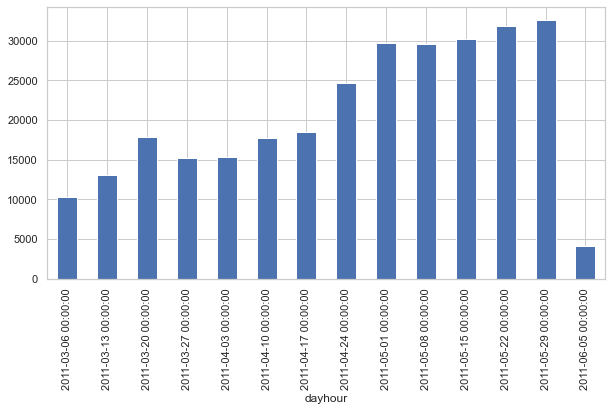

In [904]:
# weekly
hour.loc["2011-03-01" : '2011-05-30',: ].resample('1W').sum()['cnt'].plot(kind = 'bar', figsize=(10,5))

<AxesSubplot:xlabel='dayhour', ylabel='temp'>

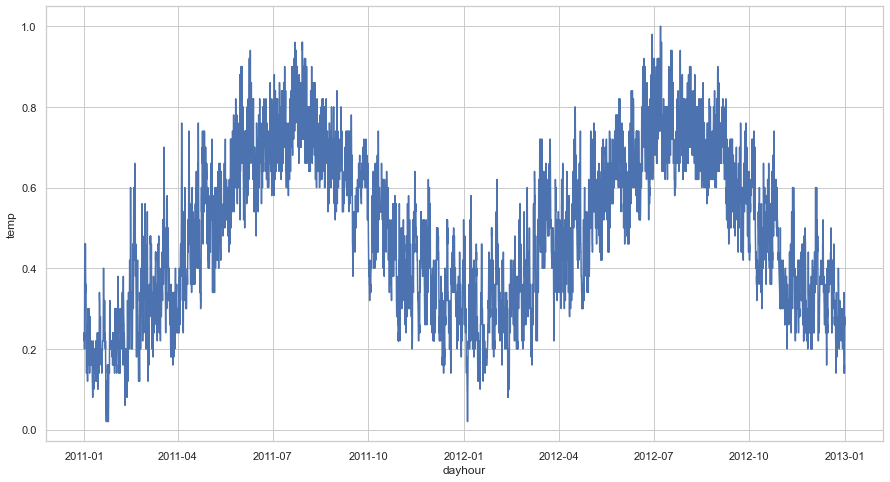

In [820]:
plt.figure(figsize=(15,8))
sns.lineplot(
    data=hour, x="dayhour", y="temp", ci=0
)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [819]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(hour['dayhour'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(hour['dayhour'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

TypeError: 'DataFrame' object is not callable

In [991]:
hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dayhour
dayhour,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,2011-01-01,1,0,1,00:00:00,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,2011-01-01 00:00:00
2011-01-01 01:00:00,2,2011-01-01,1,0,1,01:00:00,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,2011-01-01 01:00:00
2011-01-01 02:00:00,3,2011-01-01,1,0,1,02:00:00,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,2011-01-01 02:00:00
2011-01-01 03:00:00,4,2011-01-01,1,0,1,03:00:00,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,2011-01-01 03:00:00
2011-01-01 04:00:00,5,2011-01-01,1,0,1,04:00:00,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,2011-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,17375,2012-12-31,1,1,12,19:00:00,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,2012-12-31 19:00:00
2012-12-31 20:00:00,17376,2012-12-31,1,1,12,20:00:00,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,2012-12-31 20:00:00
2012-12-31 21:00:00,17377,2012-12-31,1,1,12,21:00:00,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,2012-12-31 21:00:00


In [990]:
hour["casual"].describe()

count    17379.000000
mean        35.676218
std         49.305030
min          0.000000
25%          4.000000
50%         17.000000
75%         48.000000
max        367.000000
Name: casual, dtype: float64

count    17379.000000
mean        35.676218
std         49.305030
min          0.000000
25%          4.000000
50%         17.000000
75%         48.000000
max        367.000000
Name: casual, dtype: float64


<AxesSubplot:xlabel='casual', ylabel='Count'>

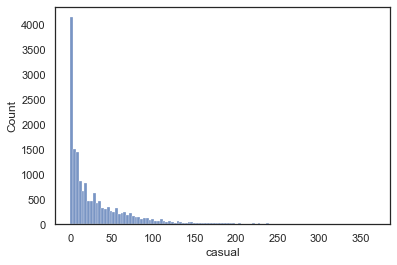

In [977]:
# 2001-2011 - Casual describe
print(hour["casual"].describe())
sns.histplot(data=hour, x="casual")

count    17379.000000
mean       153.786869
std        151.357286
min          0.000000
25%         34.000000
50%        115.000000
75%        220.000000
max        886.000000
Name: registered, dtype: float64


<AxesSubplot:xlabel='registered', ylabel='Count'>

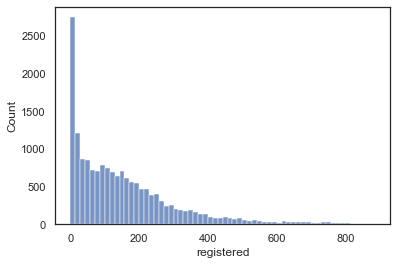

In [994]:
# 2001-2011 - Registered describe
print(hour["registered"].describe())
sns.histplot(data=hour, x="registered")

<AxesSubplot:xlabel='registered', ylabel='windspeed'>

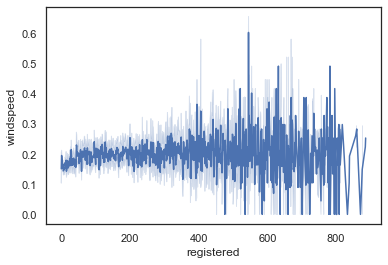

In [1005]:
sns.lineplot(data=hour, x="registered", y="windspeed")

In [988]:
hour["registered"]

dayhour
2011-01-01 00:00:00     13
2011-01-01 01:00:00     32
2011-01-01 02:00:00     27
2011-01-01 03:00:00     10
2011-01-01 04:00:00      1
                      ... 
2012-12-31 19:00:00    108
2012-12-31 20:00:00     81
2012-12-31 21:00:00     83
2012-12-31 22:00:00     48
2012-12-31 23:00:00     37
Name: registered, Length: 17379, dtype: int64

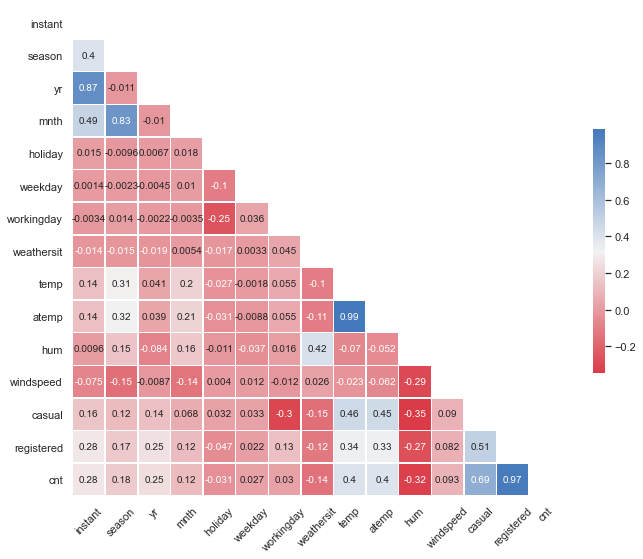

In [922]:
# correlation 

hour_heatmap = hour.iloc[:,:]
correlation_mat = hour_heatmap.corr()

# sns.heatmap(correlation_mat, annot = True)

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(correlation_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(correlation_mat, mask=mask, cmap=cmap, 
        square=True, annot=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

plt.xticks(rotation=45)
plt.savefig("wine-fig-corr.png", format='png',dpi=300)

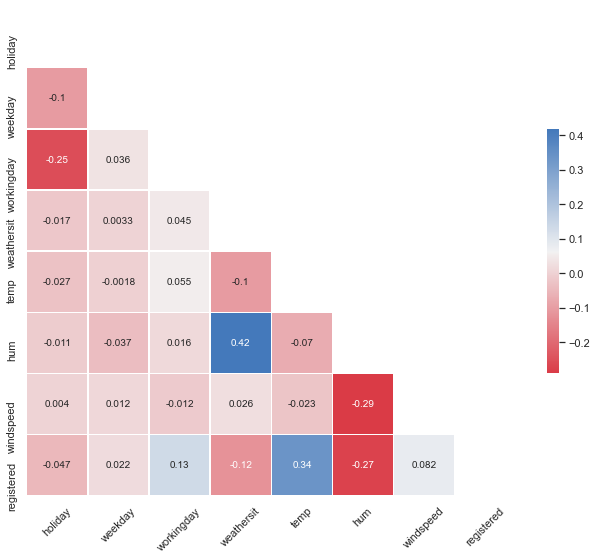

In [952]:
# correlation 

hour_heatmap = hour.loc[:,["holiday","weekday", "workingday","weathersit", "temp","hum","windspeed","registered"]]
correlation_mat = hour_heatmap.corr()

# sns.heatmap(correlation_mat, annot = True)

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(correlation_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(correlation_mat, mask=mask, cmap=cmap, 
        square=True, annot=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

plt.xticks(rotation=45)
plt.savefig("wine-fig-corr.png", format='png',dpi=300)

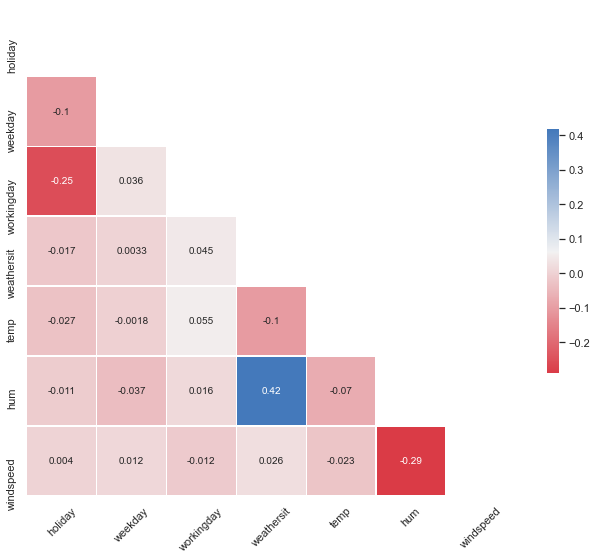

In [954]:
# correlation 

hour_heatmap = hour.loc[:,["holiday","weekday", "workingday","weathersit", "temp","hum","windspeed"]]
correlation_mat = hour_heatmap.corr()

# sns.heatmap(correlation_mat, annot = True)

# Exclude duplicate correlations by masking uper right values
mask = np.zeros_like(correlation_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set background color / chart style
sns.set_style(style = 'white')

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Add diverging colormap
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw correlation plot
sns.heatmap(correlation_mat, mask=mask, cmap=cmap, 
        square=True, annot=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

plt.xticks(rotation=45)
plt.savefig("wine-fig-corr.png", format='png',dpi=300)

In [1033]:
hour.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
holiday,0.014723,-0.009585,0.006692,0.018430,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.137615,0.319380,0.039222,0.208096,-0.030973,-0.008821,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929


In [1049]:
hour.dtypes

instant                int64
dteday                object
season                 int64
yr                     int64
mnth                   int64
hr                    object
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dayhour       datetime64[ns]
dtype: object